First, import the data

In [7]:
import pandas as pd

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv('/content/drive/MyDrive/A 2021 Spring/ECS 171/datasets/US_Accidents_Dec20.csv')

let's take a look at what's inside

In [10]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


We only want california!

In [11]:
# isolates the instances that is california
df = df[df["State"] == "CA"]

look at percentage of data that's missing

In [12]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                             	'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print(missing_value_df)

                                 column_name  percent_missing
ID                                        ID         0.000000
Crossing                            Crossing         0.000000
Give_Way                            Give_Way         0.000000
Junction                            Junction         0.000000
No_Exit                              No_Exit         0.000000
Railway                              Railway         0.000000
Roundabout                        Roundabout         0.000000
Station                              Station         0.000000
Country                              Country         0.000000
Stop                                    Stop         0.000000
State                                  State         0.000000
County                                County         0.000000
Traffic_Calming              Traffic_Calming         0.000000
Bump                                    Bump         0.000000
Side                                    Side         0.000000
Traffic_

In [13]:
# Drop columns that have a lot of the data missing
df.drop(['End_Lat', 'End_Lng', 'Number', 'Precipitation(in)', 'Wind_Chill(F)', 'TMC'], axis = 1, inplace=True)

# Drop columns that cannot be convert to numerical value or columns that are considered irrelevant 
df.drop(['ID', 'Source', 'Description', 'Street', 'Description', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode',
        'Country', 'Timezone', 'Airport_Code', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis = 1, inplace=True)

In [14]:
# remaining columns
print("Remaining columns: ", list(df))

Remaining columns:  ['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset']


But wind direction is not numerical!

In [15]:
# mapping wind directions to numerical value

df.loc[(df['Wind_Direction'] == "North"), "Wind_Direction"] = 0
df.loc[(df['Wind_Direction'] == "N"), "Wind_Direction"] = 0
df.loc[(df['Wind_Direction'] == "NNE"), "Wind_Direction"] = 1
df.loc[(df['Wind_Direction'] == "NE"), "Wind_Direction"] = 2
df.loc[(df['Wind_Direction'] == "ENE"), "Wind_Direction"] = 3
df.loc[(df['Wind_Direction'] == "East"), "Wind_Direction"] = 4
df.loc[(df['Wind_Direction'] == "E"), "Wind_Direction"] = 4
df.loc[(df['Wind_Direction'] == "ESE"), "Wind_Direction"] = 5
df.loc[(df['Wind_Direction'] == "SE"), "Wind_Direction"] = 6
df.loc[(df['Wind_Direction'] == "SSE"), "Wind_Direction"] = 7
df.loc[(df['Wind_Direction'] == "South"), "Wind_Direction"] = 8
df.loc[(df['Wind_Direction'] == "S"), "Wind_Direction"] = 8
df.loc[(df['Wind_Direction'] == "SSW"), "Wind_Direction"] = 9
df.loc[(df['Wind_Direction'] == "SW"), "Wind_Direction"] = 10
df.loc[(df['Wind_Direction'] == "WSW"), "Wind_Direction"] = 11
df.loc[(df['Wind_Direction'] == "West"), "Wind_Direction"] = 12
df.loc[(df['Wind_Direction'] == "W"), "Wind_Direction"] = 12
df.loc[(df['Wind_Direction'] == "WNW"), "Wind_Direction"] = 13
df.loc[(df['Wind_Direction'] == "NW"), "Wind_Direction"] = 14
df.loc[(df['Wind_Direction'] == "NNW"), "Wind_Direction"] = 15
df.loc[(df['Wind_Direction'] == "CALM"), "Wind_Direction"] = 16
df.loc[(df['Wind_Direction'] == "Calm"), "Wind_Direction"] = 16
df.loc[(df['Wind_Direction'] == "Variable"), "Wind_Direction"] = 17
df.loc[(df['Wind_Direction'] == "VAR"), "Wind_Direction"] = 17

Also, we have "True" or "False" value that can be turned to a bool

In [16]:
# replace all boolean values by 0 and 1
df.replace(False, 0,inplace=True)
df.replace(True, 1, inplace=True)

In [17]:
# replace Day by 1 and Night by 0
df['Sunrise_Sunset'].replace('Day', 1, inplace=True)
df['Sunrise_Sunset'].replace('Night', 0, inplace=True)

In [18]:
# convert time 
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='%Y-%m-%d %H:%M:%S')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='%Y-%m-%d %H:%M:%S')
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'], format='%Y-%m-%d %H:%M:%S')

In [19]:
# add duration in mins
df['duration_in_mins'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds()/60

In [20]:
# add weekday, starts on Monday
df['weekday'] = df['Start_Time'].dt.weekday

In [21]:
# you can add as many cols relating to date as you like
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.day_of_week.html

In [22]:
# task 2: split up weather

# turning into binary classification
# making 69 more columns lmao

# and then maybe taking in some list from task 3 to drop some columns

In [23]:
# minimum number of entries to keep each weather condition
min_weather_entries = 500

# generate a list of possible weather conditions
w_conditions = df['Weather_Condition'].unique()

weather_conditions = []
for w_cond in w_conditions:
    if (len(df[df['Weather_Condition'] == w_cond]) >= min_weather_entries):
        weather_conditions.append(w_cond)

print(weather_conditions)

['Clear', 'Partly Cloudy', 'Haze', 'Mostly Cloudy', 'Overcast', 'Scattered Clouds', 'Light Rain', 'Mist', 'Smoke', 'Fog', 'Rain', 'Heavy Rain', 'Light Snow', 'Fair', 'Cloudy', 'Fair / Windy', 'Mostly Cloudy / Windy', 'Partly Cloudy / Windy']


In [24]:
# create binary classifications
for w_cond in weather_conditions:
    df[w_cond] = df['Weather_Condition'] == w_cond
    df[w_cond] = df[w_cond].astype(float)
    print(f"{w_cond}: {len(df[df[w_cond] == 1.0])}")

Clear: 253061
Partly Cloudy: 80181
Haze: 31679
Mostly Cloudy: 86875
Overcast: 58469
Scattered Clouds: 29357
Light Rain: 31020
Mist: 556
Smoke: 5633
Fog: 10469
Rain: 10176
Heavy Rain: 3524
Light Snow: 643
Fair: 282753
Cloudy: 58189
Fair / Windy: 3199
Mostly Cloudy / Windy: 503
Partly Cloudy / Windy: 673


In [25]:
# task 3: weather stuff, do some data exploration, prove what to drop
# peter

In [26]:
# get a list of correlations with weather conditions
print(df.corr()['duration_in_mins'][weather_conditions])

Clear                   -0.000265
Partly Cloudy            0.000331
Haze                    -0.000885
Mostly Cloudy           -0.001791
Overcast                -0.002726
Scattered Clouds         0.000246
Light Rain              -0.002896
Mist                    -0.000500
Smoke                    0.001235
Fog                      0.000870
Rain                    -0.001630
Heavy Rain              -0.001231
Light Snow               0.000271
Fair                     0.005105
Cloudy                  -0.003204
Fair / Windy            -0.000399
Mostly Cloudy / Windy   -0.000674
Partly Cloudy / Windy    0.000232
Name: duration_in_mins, dtype: float64


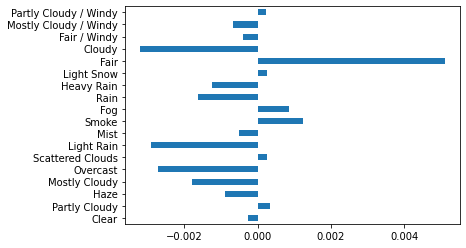

In [27]:
%matplotlib inline
# plot 
df.corr()['duration_in_mins'][weather_conditions].plot(kind='barh')

In [28]:
# Drop the rows where at least one element is missing.
data_len = len(df)
df = df.dropna()
print("dropped data: ", data_len - len(df))

dropped data:  150211


In [29]:
# remaining columns
print("Remaining columns: ", list(df))

Remaining columns:  ['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'duration_in_mins', 'weekday', 'Clear', 'Partly Cloudy', 'Haze', 'Mostly Cloudy', 'Overcast', 'Scattered Clouds', 'Light Rain', 'Mist', 'Smoke', 'Fog', 'Rain', 'Heavy Rain', 'Light Snow', 'Fair', 'Cloudy', 'Fair / Windy', 'Mostly Cloudy / Windy', 'Partly Cloudy / Windy']


## data exploration!

In [30]:
import seaborn as sns

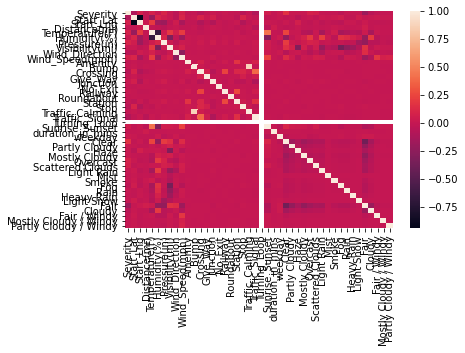

In [31]:
# heat map
sns.heatmap(df.corr(), xticklabels = True, yticklabels = True)

We see that Start_lat and start_long have a really high correlation; we should normalize it!
High correlation between bump and stop; we can get rid of one!

Let's do heat maps for each severity!

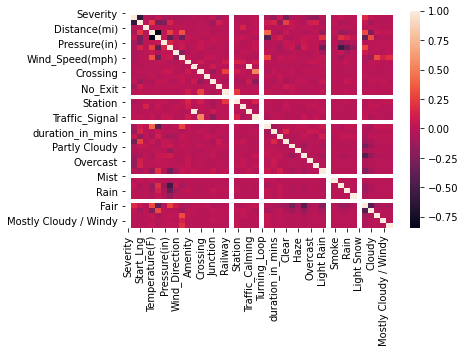

In [32]:
# severity 1 heat map

severity1 = df[df["Severity"]==1]
sns.heatmap(severity1.corr())

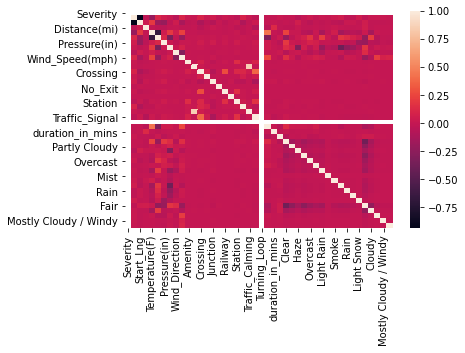

In [33]:
# severity 2 heat map

severity2 = df[df["Severity"]==2]
sns.heatmap(severity2.corr())

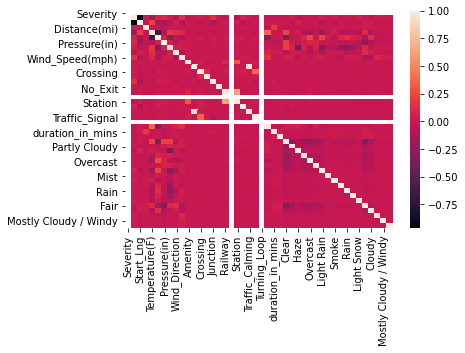

In [34]:
# severity 3 heat map

severity3 = df[df["Severity"]==3]
sns.heatmap(severity3.corr())

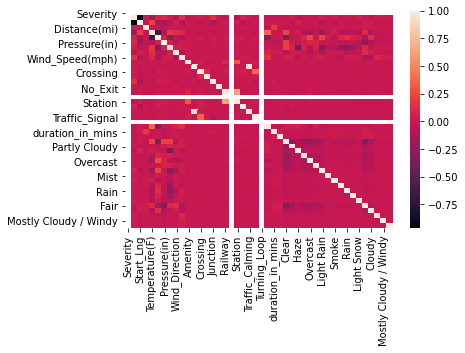

In [35]:
# severity 4 heat map

severity4 = df[df["Severity"]==3]
sns.heatmap(severity4.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe23fd54d0>]],
      dtype=object)

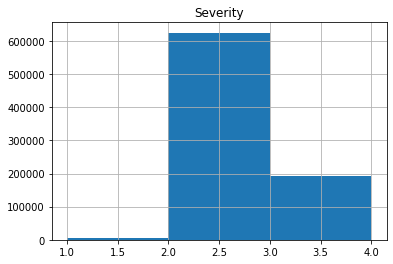

In [36]:
# what is the distribution of severity of accidents in CA?

df.hist("Severity", bins=[1,2,3,4])

We can see that majority of accidents are around 2

In [37]:
# lets see the percentages of the different severities

df["Severity"].value_counts(normalize=True)

# since we have so much severity 2, we want to normalize it by increasing other severity instances

# using sklearn

2    0.759831
3    0.224841
4    0.008520
1    0.006808
Name: Severity, dtype: float64

In [38]:
# we can try to get duration of crash (end - start)

# if we do severity is terms of a continous variable, then we want to linear

## Feature Selection

In [39]:
# we want 10 to 15 features

# principle component analysis and show why we're choosing these features
# reference: like the last 3/4th of the discusion in lect 7 lol

# erik, harjot, jackson

## Harjot's Feature Selection

### Turn Start_Time into a float that represents the time that the accident started

In [40]:
def get_time(row):
    return round(row['Start_Time'].hour + row['Start_Time'].minute / 60, 1)

df['Start_Time'] = df.apply(get_time, axis=1)

### Drop Weather_Condition column since it has already been encoded

In [41]:
df.drop(['Weather_Condition'], inplace=True, axis=1)

### Drop non-categorical features with low variance, since model won't learn anything if all data points are close to one another.

In [42]:
df.var()

Severity                      0.210472
Start_Time                   33.775291
Start_Lat                     4.268657
Start_Lng                     3.827593
Distance(mi)                  0.459376
Temperature(F)              171.677497
Humidity(%)                 563.844649
Pressure(in)                  0.408719
Visibility(mi)                5.875693
Wind_Direction               21.811381
Wind_Speed(mph)              32.510601
Amenity                       0.006167
Bump                          0.000266
Crossing                      0.033474
Give_Way                      0.000908
Junction                      0.115190
No_Exit                       0.000559
Railway                       0.010358
Roundabout                    0.000022
Station                       0.018939
Stop                          0.021516
Traffic_Calming               0.000350
Traffic_Signal                0.073995
Turning_Loop                  0.000000
Sunrise_Sunset                0.227775
duration_in_mins         

In [43]:
df.drop(['Pressure(in)', 'Distance(mi)'], axis=1, inplace=True)

### Drop features a user would not be able to determine, and redundant features

In [44]:
df.corr()

,Severity,Start_Time,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Wind_Direction,Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,duration_in_mins,weekday,Clear,Partly Cloudy,Haze,Mostly Cloudy,Overcast,Scattered Clouds,Light Rain,Mist,Smoke,Fog,Rain,Heavy Rain,Light Snow,Fair,Cloudy,Fair / Windy,Mostly Cloudy / Windy,Partly Cloudy / Windy
Severity,1.000000,0.014207,-0.098452,0.072708,0.081705,0.014607,0.011947,-0.039431,0.070060,-0.009470,-0.003814,-0.059985,-0.010523,0.015725,-0.000800,0.008217,-0.002397,-0.010543,-0.046565,-0.004916,-0.084630,NaN,0.047316,-0.006471,0.028286,0.161210,0.017327,0.009275,0.013735,0.082748,0.062516,0.006371,-0.002584,-0.007722,-0.036420,0.003296,-0.001437,-0.002266,-0.186054,-0.053115,-0.017941,-0.003714,-0.007506
Start_Time,0.014207,1.000000,-0.022307,0.023289,0.251185,-0.215838,0.112887,0.015442,0.177673,0.003721,-0.000379,0.000680,-0.000792,0.002163,0.000891,-0.002058,-0.000579,0.007411,-0.008762,-0.000505,0.007549,NaN,-0.006734,0.000874,-0.008846,0.103762,0.050241,-0.032458,0.011117,-0.064778,0.026257,-0.030660,-0.016600,-0.000364,-0.082968,-0.021309,-0.010615,-0.000055,-0.018134,-0.075292,0.008707,0.006020,0.005803
Start_Lat,-0.098452,-0.022307,1.000000,-0.939867,-0.198972,0.100538,0.019150,-0.050100,0.103604,0.006159,0.011385,0.086051,0.021263,0.065302,-0.008873,0.006565,0.002009,-0.042282,0.091778,0.012293,-0.019983,NaN,-0.016032,-0.001956,0.013377,-0.018746,0.000491,-0.052288,-0.002590,0.008395,-0.016347,0.026732,0.007633,0.027576,0.045687,-0.014207,-0.021187,0.043563,0.002303,0.012543,0.023987,0.014379,0.010717
Start_Lng,0.072708,0.023289,-0.939867,1.000000,0.202642,-0.161977,-0.026163,0.043169,-0.122148,-0.016623,-0.016036,-0.098400,-0.028225,-0.086403,0.005671,-0.015788,-0.002553,0.018407,-0.090821,-0.017959,0.015386,NaN,0.007681,0.002730,-0.010507,0.021881,-0.019198,0.061727,-0.014798,-0.029269,0.000411,-0.035528,-0.010729,-0.030049,-0.038496,0.013404,0.017501,-0.009092,0.028818,-0.014607,-0.022230,-0.015729,-0.011184
Temperature(F),0.081705,0.251185,-0.198972,0.202642,1.000000,-0.652242,0.192528,0.072550,0.211277,-0.002789,-0.003790,-0.020561,-0.005837,-0.005865,0.002416,-0.004147,-0.001032,0.008533,-0.025862,-0.004260,0.015321,NaN,0.424230,-0.000562,-0.016229,0.248487,0.012916,0.022140,-0.063475,-0.089513,0.015117,-0.142773,-0.017168,0.052135,-0.134799,-0.091808,-0.053844,-0.068783,0.030390,-0.135514,0.010715,-0.002161,-0.001091
Humidity(%),0.014607,-0.215838,0.100538,-0.161977,-0.652242,1.000000,-0.325403,-0.020142,-0.169061,0.009488,0.002865,0.016822,0.004293,0.016607,-0.001202,0.013838,0.001304,0.012584,0.013582,0.004690,-0.005773,NaN,-0.300584,-0.006054,0.030280,-0.219794,-0.016398,0.024489,0.079601,0.196409,0.011137,0.216117,0.031742,-0.041521,0.165360,0.135410,0.080217,0.034832,-0.212975,0.198167,-0.059239,-0.007969,-0.017351
Visibility(mi),0.011947,0.112887,0.019150,-0.026163,0.192528,-0.325403,1.000000,0.029246,0.075934,0.004038,0.004387,0.012110,0.002508,0.004679,-0.000077,0.003776,-0.000044,0.006951,0.001219,0.003692,0.015428,NaN,0.040743,0.000973,-0.008993,0.156288,0.081702,-0.308235,0.062713,-0.032268,0.046081,-0.211810,-0.055619,-0.083882,-0.363659,-0.237372,-0.179361,-0.068719,0.164937,-0.023802,0.023792,0.007653,0.014599
Wind_Direction,-0.039431,0.015442,-0.050100,0.043169,0.072550,-0.020142,0.029246,1.000000,-0.247681,0.006322,-0.001238,0.001700,-0.001399,-0.008765,0.003755,0.009206,-0.001749,0.013122,0.000067,-0.001179,0.008440,NaN,0.023190,0.002095,0.023426,-0.068225,0.019026,0.024760,-0.010607,-0.073285,-0.010852,-0.099941,0.003306,0.008969,0.021619,-0.065081,-0.031500,-0.002038,0.138785,0.009698,-0.025567,-0.007217,-0.011665
Wind_Speed(mph),0.070060,0.177673,0.103604,-0.122148,0.211277,-0.169061,0.075934,-0.247681,1.000000,0.001263,0.000862,0.003810,0.000581,0.023410,-0.005022,0.001161,-0.000216,-0.005386,0.001609,0.000707,-0.010211,NaN,0.23

In [45]:
# Features that are highly correlated with other features
df.drop(['End_Time', 'Weather_Timestamp', 'Start_Lng', 'Turning_Loop'], axis=1, inplace=True)

In [46]:
# Weather conditions is redundant since temperature, precipitation, etc. capture it
df.drop(weather_conditions, axis=1, inplace=True)

### Drop outliers (collisions lasting longer than 360 minutes) in duration of collision 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe1e03f410>]],
      dtype=object)

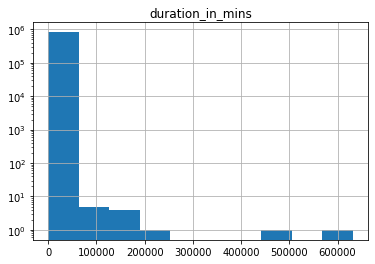

In [47]:
pd.DataFrame.hist(df, column=['duration_in_mins'], log=True)

In [48]:
df = df[df['duration_in_mins'] <= 360]
print(f'Size after drop {df.shape[0]}')

Size after drop 807565


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe435f1150>]],
      dtype=object)

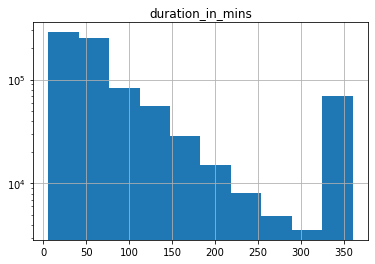

In [49]:
pd.DataFrame.hist(df, column=['duration_in_mins'], log=True)

# Jackson Feature selection

## Univariate Feature Selection

Using selectKbest

In [50]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
#from sklearn.feature_selection import chi2
import numpy as np

In [51]:
X_kbest = df.drop(['duration_in_mins'], axis=1)
Y_kbest = df['duration_in_mins']
X_kbest = np.asarray(X_kbest.values)
Y_kbest = np.asarray(Y_kbest.values)
test = SelectKBest(score_func=f_classif, k=10) #can change k to choose how many features to be selected
fit = test.fit(X_kbest, Y_kbest)
set_printoptions(precision=3)
features = fit.transform(X_kbest)

## Plotting the scores for SelectKBest

2.6697748337994764


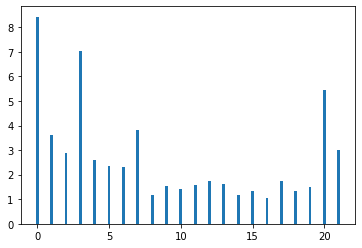

In [52]:
import matplotlib.pyplot as plt
X_indices = np.arange(X_kbest.shape[-1])
ax = plt.bar(X_indices, fit.scores_, width=.2)
avg = np.average(fit.scores_)
print(avg)

## Adds the best features to a list called new_features

In [53]:
feature_names = list(df.drop(['duration_in_mins'], axis=1).columns.values)
mask = test.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)
new_features

['Severity',
 'Start_Time',
 'Start_Lat',
 'Temperature(F)',
 'Humidity(%)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Sunrise_Sunset',
 'weekday']

In [54]:
duration_in_mins = df["duration_in_mins"]
univariate_df = df[new_features]
univariate_df["duration_in_mins"] = duration_in_mins

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### One Hot Encode weekday, wind direction, and severity (changed)


In [55]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder()
#OHE_features = OHE.fit_transform(df[['weekday', 'Wind_Direction', 'Severity']])
OHE_features = OHE.fit_transform(df[['weekday', 'Wind_Direction']])

In [56]:
OHE_features_df = pd.DataFrame.sparse.from_spmatrix(OHE_features, columns=OHE.get_feature_names())

In [57]:
#df.drop(['weekday', 'Wind_Direction', 'Severity'], inplace=True, axis=1)
df.drop(['weekday', 'Wind_Direction'], inplace=True, axis=1)
df = pd.concat([df.reset_index(drop=True), OHE_features_df.reset_index(drop=True)], axis=1)

### Standard Scaler on continuous inputs

In [58]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Start_Time', 'Start_Lat', 'Temperature(F)', 'Humidity(%)', 
                      'Visibility(mi)', 'Wind_Speed(mph)']
# Do the scaling and create a DF for the scaled features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_features])
scaled_features_df = pd.DataFrame(scaled_features, columns=numerical_features)

# Drop the old columns in X and add the new scaled ones
df.drop(numerical_features, inplace=True, axis=1)
df = pd.concat([scaled_features_df, df], axis=1)

### Drop outliers

In [59]:
# This takes roughly 3 minutes (on Harjot's machine)
from sklearn.ensemble import IsolationForest
detector = IsolationForest(n_jobs=-1)
outliers = detector.fit_predict(df)

In [60]:
import numpy as np
df.reset_index(drop=True,inplace=True)

if_outcome = np.where(outliers == -1)
print(f'Size before drop {df.shape[0]}')
df.drop(if_outcome[0], inplace=True)
print(f'Size after drop {df.shape[0]}')

Size before drop 807565
Size after drop 804100


### Split DF into X (independent variables) and Y (dependent) variables

In [61]:
print(df.head())
X = df.drop(["duration_in_mins"], axis = 1)
Y = df['duration_in_mins']

   Start_Time  Start_Lat  Temperature(F)  ...  x1_15.0  x1_16.0  x1_17.0
0   -0.450709   1.185216        0.796134  ...      0.0      0.0      1.0
1   -0.467892   0.965824        0.796134  ...      0.0      0.0      0.0
2   -0.416343   1.093907        1.399203  ...      1.0      0.0      0.0
3   -0.433526   0.821869        0.864838  ...      0.0      0.0      0.0
4   -0.502258   0.781460        0.811401  ...      0.0      0.0      1.0

[5 rows x 46 columns]


In [62]:
X.reset_index(inplace=True, drop=True)

### Create a 70:30 train test split

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

## Make a Severity Classifier Model (changed by Steph)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

In [70]:
df.head()

,Start_Time,Start_Lat,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Severity,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,duration_in_mins,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,x1_0.0,x1_1.0,x1_2.0,x1_3.0,x1_4.0,x1_5.0,x1_6.0,x1_7.0,x1_8.0,x1_9.0,x1_10.0,x1_11.0,x1_12.0,x1_13.0,x1_14.0,x1_15.0,x1_16.0,x1_17.0
0,-0.450709,1.185216,0.796134,-0.444127,0.356423,-0.159326,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.467892,0.965824,0.796134,-0.444127,0.356423,-0.369319,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,46.383333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.416343,1.093907,1.399203,-1.161361,0.356423,-0.369319,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.433526,0.821869,0.864838,-0.444127,0.356423,-0.369319,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.502258,0.781460,0.811401,-0.739458,0.356423,-0.159326,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.833333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [73]:
log_x = df[['Start_Lat', 'Start_Time', 'Humidity(%)', 'Temperature(F)', 'Wind_Speed(mph)']]
log_y = df[["Severity"]]

log_X_train, log_X_test, log_Y_train, log_Y_test = train_test_split(log_x, log_y, test_size=0.3)

log = LogisticRegression()
log.fit(log_X_train, log_Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
log_y_pred = log.predict(np.array(log_X_test))
prec = precision_score(log_Y_test, log_y_pred, average="macro", zero_division=0)
recall = recall_score(log_Y_test, log_y_pred, average="macro", zero_division=0)
print(prec)
print(recall)

0.26801054879719044
0.25004836839981825


## Make the 4 different models (changed by Steph)

In [87]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error


### model for severity of 1


In [88]:
df1 = df[df["Severity"] == 1]

new_model_x = df1[['Start_Lat', 'Start_Time', 'Humidity(%)', 'Temperature(F)', 'Wind_Speed(mph)']]
new_model_y = df1[["Severity"]]

new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_model_x, new_model_y, train_size=.7)
new_y_train = new_y_train.astype(int)

def severity1(new_x_train, new_x_test, new_y_train, new_y_test):
  # MLP = multilayer layer perceptron = 3
  # split the data by 70:30
  
  # extract mean variance
  # use mini-batch for NN
  sklearn_nn = MLPRegressor(hidden_layer_sizes = (4,5,6), activation = "relu", solver="adam", batch_size =50, learning_rate_init=.005).fit(new_x_train, new_y_train)
  y_pred = sklearn_nn.predict(new_x_test)

  mse = mean_squared_error(new_y_test, y_pred, squared=False)

  print("mse: ", mse)

severity1(new_x_train, new_x_test, new_y_train, new_y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mse:  0.006781767631505999


In [89]:
df2 = df[df["Severity"] == 2]

new_model_x = df2[['Start_Lat', 'Start_Time', 'Humidity(%)', 'Temperature(F)', 'Wind_Speed(mph)']]
new_model_y = df2[["Severity"]]

new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_model_x, new_model_y, train_size=.7)
new_y_train = new_y_train.astype(int)

def severity1(new_x_train, new_x_test, new_y_train, new_y_test):
  # MLP = multilayer layer perceptron = 3
  # split the data by 70:30
  
  # extract mean variance
  # use mini-batch for NN
  sklearn_nn = MLPRegressor(hidden_layer_sizes = (4,5,6), activation = "relu", solver="adam", batch_size =50, learning_rate_init=.005).fit(new_x_train, new_y_train)
  y_pred = sklearn_nn.predict(new_x_test)

  mse = mean_squared_error(new_y_test, y_pred, squared=False)

  print("mse: ", mse)

severity1(new_x_train, new_x_test, new_y_train, new_y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mse:  2.298230294073278e-06


In [90]:
df3 = df[df["Severity"] == 3]

new_model_x = df3[['Start_Lat', 'Start_Time', 'Humidity(%)', 'Temperature(F)', 'Wind_Speed(mph)']]
new_model_y = df3[["Severity"]]

new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_model_x, new_model_y, train_size=.7)
new_y_train = new_y_train.astype(int)

def severity1(new_x_train, new_x_test, new_y_train, new_y_test):
  # MLP = multilayer layer perceptron = 3
  # split the data by 70:30
  
  # extract mean variance
  # use mini-batch for NN
  sklearn_nn = MLPRegressor(hidden_layer_sizes = (4,5,6), activation = "relu", solver="adam", batch_size =50, learning_rate_init=.005).fit(new_x_train, new_y_train)
  y_pred = sklearn_nn.predict(new_x_test)

  mse = mean_squared_error(new_y_test, y_pred, squared=False)

  print("mse: ", mse)

severity1(new_x_train, new_x_test, new_y_train, new_y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mse:  0.002926218618077847


In [91]:
df4 = df[df["Severity"] == 4]

new_model_x = df4[['Start_Lat', 'Start_Time', 'Humidity(%)', 'Temperature(F)', 'Wind_Speed(mph)']]
new_model_y = df4[["Severity"]]

new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_model_x, new_model_y, train_size=.7)
new_y_train = new_y_train.astype(int)

def severity1(new_x_train, new_x_test, new_y_train, new_y_test):
  # MLP = multilayer layer perceptron = 3
  # split the data by 70:30
  
  # extract mean variance
  # use mini-batch for NN
  sklearn_nn = MLPRegressor(hidden_layer_sizes = (4,5,6), activation = "relu", solver="adam", batch_size =50, learning_rate_init=.005).fit(new_x_train, new_y_train)
  y_pred = sklearn_nn.predict(new_x_test)

  mse = mean_squared_error(new_y_test, y_pred, squared=False)

  print("mse: ", mse)

severity1(new_x_train, new_x_test, new_y_train, new_y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mse:  0.004550905639012447


### Create RandomForestRegressor to get best features

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# This takes roughly 3 minutes on Harjot's machine
rfr = RandomForestRegressor(n_estimators=15)
rfr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# Get feature importance DF
pd.DataFrame(rfr.feature_importances_, index=X_train.columns).sort_values(by=[0], ascending=False)

,0
Start_Lat,0.225644
Start_Time,0.152143
Temperature(F),0.116341
Humidity(%),0.115922
Wind_Speed(mph),0.099617
x2_3,0.035416
Visibility(mi),0.026833
x0_4,0.012771
x0_3,0.012763
x0_2,0.012503


In [ ]:
# Extract the five best features
top_5 = ['Start_Lat', 'Start_Time', 'Humidity(%)', 'Temperature(F)', 'Wind_Speed(mph)']
X = df[top_5]

In [ ]:
# intersection of jackson and harjot's features match!!

### Recreate the 70:30 train test split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

### Create Keras model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dropout(0.5)) dropout layer prevents overfitting but the model doesnt overfit to begin with
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

In [ ]:
# from tensorflow.keras.optimizers import Adam
# opt = Adam(lr=0.1)
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [ ]:
# DONT RUN ABOVE CELLS UNLESS YOU'RE CREATING A NEW MODEL (e.g: adding layers, neurons, etc.)
# Load the already trained weights
model = keras.models.load_model('/content/drive/MyDrive/A 2021 Spring/ECS 171/datasets/accidents_model')

In [ ]:
model.fit(X_train, Y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/50
28150/28150 [==============================] - 45s 2ms/step - loss: 8855.8154 - mean_squared_error: 8855.8154 - val_loss: 8877.0869 - val_mean_squared_error: 8877.0869
Epoch 2/50
28150/28150 [==============================] - 42s 1ms/step - loss: 8852.6133 - mean_squared_error: 8852.6133 - val_loss: 8861.8174 - val_mean_squared_error: 8861.8174
Epoch 3/50
28150/28150 [==============================] - 42s 1ms/step - loss: 8853.6230 - mean_squared_error: 8853.6230 - val_loss: 8865.5713 - val_mean_squared_error: 8865.5713
Epoch 4/50
28150/28150 [==============================] - 42s 1ms/step - loss: 8853.2305 - mean_squared_error: 8853.2305 - val_loss: 8868.4297 - val_mean_squared_error: 8868.4297
Epoch 5/50
28150/28150 [==============================] - 41s 1ms/step - loss: 8851.8857 - mean_squared_error: 8851.8857 - val_loss: 8872.5430 - val_mean_squared_error: 8872.5430
Epoch 6/50
28150/28150 [==============================] - 41s 1ms/step - loss: 8852.6250 - mean_squared_e

In [ ]:
# save the weights for the model
model.save('accidents_model')

INFO:tensorflow:Assets written to: accidents_model/assets


In [ ]:
model.evaluate(X_test, Y_test)

7541/7541 [==============================] - 7s 968us/step - loss: 8846.0850 - mean_squared_error: 8846.0850


[8846.0849609375, 8846.0849609375]

In [ ]:
'''
for i in range(len(X_test)):
    row = np.array(X_test.iloc[i,:]).reshape(1,-1)
    predicted = model.predict(row)
    print(f'Predicted: {predicted}, Actual: {Y_test.iloc[i]}, Diff {predicted-Y_test.iloc[i]}')
'''

"\nfor i in range(len(X_test)):\n    row = np.array(X_test.iloc[i,:]).reshape(1,-1)\n    predicted = model.predict(row)\n    print(f'Predicted: {predicted}, Actual: {Y_test.iloc[i]}, Diff {predicted-Y_test.iloc[i]}')\n"

## Model creation

In [ ]:
# linear regression model
from sklearn import linear_model

# pick the indp columns
indpFeatures = X
depFeatures = df["duration_in_mins"]

# split the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(indpFeatures,depFeatures,test_size=0.3)

# make the linear model with sklearn
linearModel = linear_model.LinearRegression()
linearModel.fit(x_train, y_train)

# test the model
from sklearn.metrics import mean_squared_error

y_pred = linearModel.predict(np.array(x_test))

mse = mean_squared_error(y_test, y_pred, squared=False)

print("mse: ", mse)

mse:  95.35202424720758


In [ ]:
# MLP = multilayer layer perceptron = 3
from sklearn.neural_network import MLPRegressor
# split the data by 70:30
x_train2, x_test2, y_train2, y_test2 = train_test_split(indpFeatures, depFeatures, train_size=.7)
# extract mean variance
y_train2 = y_train2.astype(int)
# use mini-batch for NN
sklearn_nn = MLPRegressor(hidden_layer_sizes = (4,5,6), activation = "relu", solver="adam", batch_size =50, learning_rate_init=.005).fit(x_train2, y_train2)
y_pred = sklearn_nn.predict(x_test2)

mse = mean_squared_error(y_test2, y_pred, squared=False)

print("mse: ", mse)

mse:  94.51015835186399


In [ ]:
# MLP = multilayer layer perceptron = 3
from sklearn.neural_network import MLPRegressor
# split the data by 70:30
x_train2, x_test2, y_train2, y_test2 = train_test_split(indpFeatures, depFeatures, train_size=.7)
# extract mean variance
y_train2 = y_train2.astype(int)
# use mini-batch for NN
sklearn_nn = MLPRegressor(hidden_layer_sizes = (4,6,8), activation = "relu", solver="adam", batch_size =50, learning_rate_init=.005).fit(x_train2, y_train2)
y_pred = sklearn_nn.predict(x_test2)

mse = mean_squared_error(y_test2, y_pred, squared=False)

print("mse: ", mse)

mse:  94.59679904702041
